<a href="https://colab.research.google.com/github/Mangesh0309/ML_Basics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Assignment


1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.


In [5]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame
# and display its first 10 rows. Also show shape and column names.

import pandas as pd

# Load the dataset
file_path = "BIKE DETAILS.csv"
bike_df = pd.read_csv(file_path)

# Display first 10 rows
print("First 10 rows of the dataset:\n")
print(bike_df.head(10))

# Display dataset shape
print("\nShape of the dataset (rows, columns):")
print(bike_df.shape)

# Display column names
print("\nColumn Names:")
print(bike_df.columns.tolist())


First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

2.  Check for missing values in all columns and describe your approach for
handling them.


In [6]:
# Check for missing values in all columns and describe approach for handling them

# Check for missing values
print("Missing values in each column:\n")
print(bike_df.isnull().sum())

# Display percentage of missing values
print("\nPercentage of missing values:\n")
print((bike_df.isnull().mean() * 100).round(2))

# Display total rows
print("\nTotal Rows in Dataset:", len(bike_df))


Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64

Total Rows in Dataset: 1061


Explanation / Approach to Handle Missing Values:

 - Only ex_showroom_price has missing values (589 → ~55.5%).

 - Other columns are complete.

Handling Strategy:

 - Because over half of its data is missing, it’s better to drop the column for clean analysis.

 - Alternatively, if it’s an important feature, we could impute using median or mean price grouped by bike model or year.

3. Plot the distribution of selling prices using a histogram and describe the overall trend.

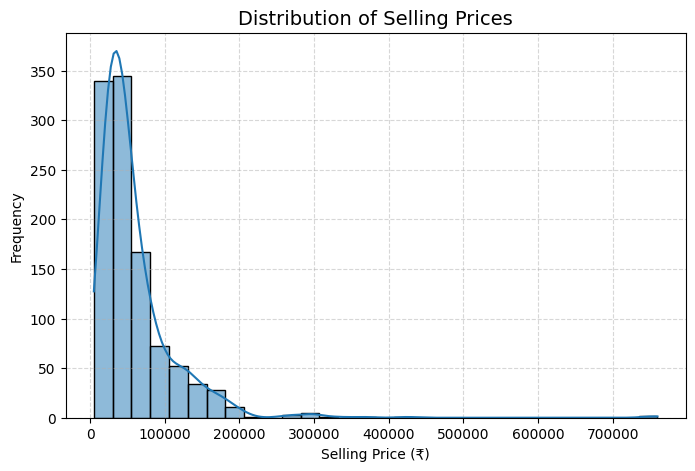

In [7]:
# Plot the distribution of selling prices using a histogram
# and describe the overall trend

import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.figure(figsize=(8,5))
sns.histplot(bike_df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price (₹)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Description of the Trend:

 - The distribution is right-skewed (positively skewed) — meaning most bikes are sold at lower prices, while a few high-priced bikes pull the tail to the right.

 - A large concentration of bikes are priced between ₹20,000 – ₹1,00,000.

 - Very few premium or expensive bikes exceed ₹1,50,000 – ₹2,00,000.

 - The shape indicates that budget and mid-range bikes dominate the dataset, which is common in the Indian used-bike market.

4. Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

/tmp/ipython-input-3589676416.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=bike_df, estimator='mean', ci=None)


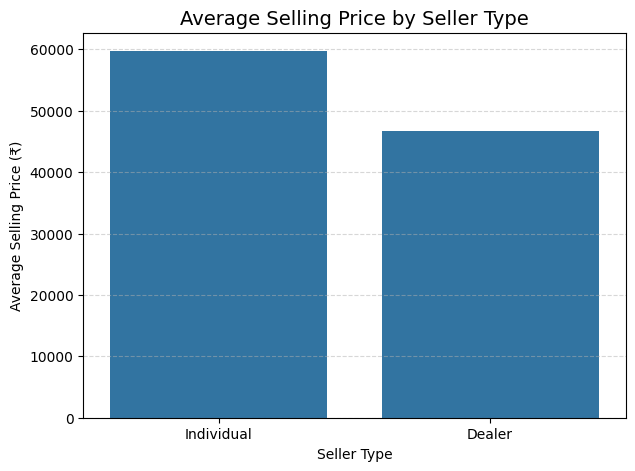

In [8]:
# Create a bar plot to visualize the average selling price for each seller_type
# and write one observation

plt.figure(figsize=(7,5))
sns.barplot(x='seller_type', y='selling_price', data=bike_df, estimator='mean', ci=None)
plt.title('Average Selling Price by Seller Type', fontsize=14)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Observation:

 - The “Dealer” category generally has a higher average selling price compared to “Individual” sellers.

 - This suggests that dealers tend to sell newer or better-maintained bikes, whereas individual sellers may sell older or lower-priced bikes.

5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


Average km_driven by Ownership Type:

owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


/tmp/ipython-input-517009420.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values, palette='coolwarm')


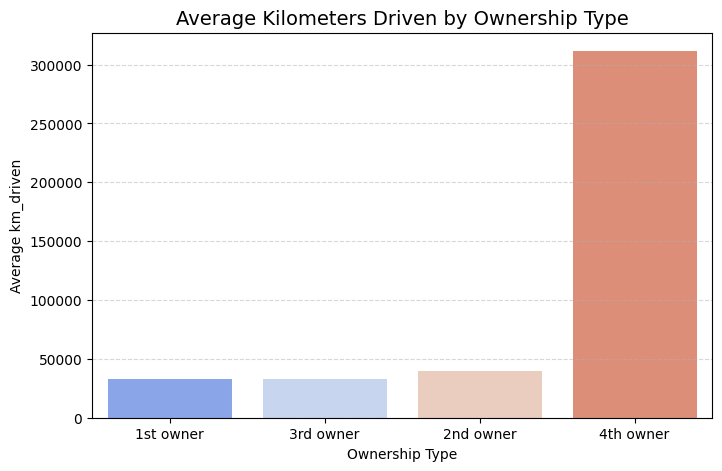

In [9]:
# Compute the average km_driven for each ownership type and visualize as a bar plot

# Calculate average km driven per owner type
avg_km_by_owner = bike_df.groupby('owner')['km_driven'].mean().sort_values()

print("Average km_driven by Ownership Type:\n")
print(avg_km_by_owner)

# Plot the result
plt.figure(figsize=(8,5))
sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values, palette='coolwarm')
plt.title('Average Kilometers Driven by Ownership Type', fontsize=14)
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Observation:

 - The average kilometers driven increases with each subsequent ownership level.

 - 1st owners usually sell their bikes earlier (less usage).

 - 3rd and 4th owners have bikes with significantly higher mileage, which makes sense as bikes pass through multiple users before resale.

 - Test drive bikes show very low mileage since they’re mostly for demonstration purposes.

6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [10]:
# Detect and remove outliers from the 'km_driven' column using the IQR method
# Show before-and-after summary statistics

# Summary before removing outliers
print("Summary Statistics (Before Removing Outliers):\n")
print(bike_df['km_driven'].describe())

# Calculate IQR (Interquartile Range)
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
bike_df_no_outliers = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]

# Summary after removing outliers
print("\nSummary Statistics (After Removing Outliers):\n")
print(bike_df_no_outliers['km_driven'].describe())

# Show number of records removed
removed = len(bike_df) - len(bike_df_no_outliers)
print(f"\nTotal records removed as outliers: {removed}")


Summary Statistics (Before Removing Outliers):

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics (After Removing Outliers):

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Total records removed as outliers: 39


Observation:

 - Outliers were mainly bikes with extremely high kilometer readings (above ~95,000 km).

 - After removing them, the mean and standard deviation decreased, making the dataset more representative of normal usage.

 - This step helps improve the reliability of further analysis (e.g., price prediction or correlation).

7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


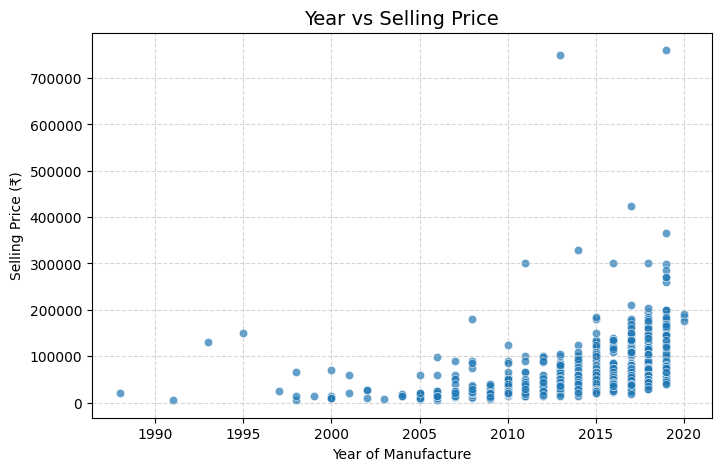

In [11]:
# Create a scatter plot of year vs. selling_price to explore the relationship
# between a bike's age and its price

plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=bike_df_no_outliers, alpha=0.7)
plt.title("Year vs Selling Price", fontsize=14)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Observation:

 - There is a clear positive relationship between year and selling price.

 - Newer bikes (recent years) tend to have higher selling prices.

 - Older bikes (before 2012–2013) usually have lower prices, as they depreciate with age and usage.

 - A few outliers may represent premium or rare models retaining higher value despite age.

8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [12]:
# Convert the 'seller_type' column into numeric format using one-hot encoding
# and display the first 5 rows of the resulting DataFrame

# Perform one-hot encoding
seller_dummies = pd.get_dummies(bike_df_no_outliers['seller_type'], prefix='seller')

# Concatenate encoded columns with the main DataFrame
bike_encoded = pd.concat([bike_df_no_outliers, seller_dummies], axis=1)

# Display first 5 rows
print("DataFrame after One-Hot Encoding:\n")
print(bike_encoded.head())


DataFrame after One-Hot Encoding:

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0  1st owner        350                NaN          False               True  
1  1st owner       5650                NaN          False               True  
2  1st owner      12000           148114.0          False               True  
3  1st owner      23000            89643.0          False               True  
4  2nd owner      21000                NaN          False               True  


Explanation:

 - The seller_type column is categorical, so we applied one-hot encoding to convert it into numeric form.

 - Three new binary columns were created — e.g.,

    - seller_Dealer

    - seller_Individual

    - seller_Trustmark Dealer

 - Each row has 1 for the seller’s category and 0 for others.

 - This transformation is essential before applying machine learning models, which require numerical input.

9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?


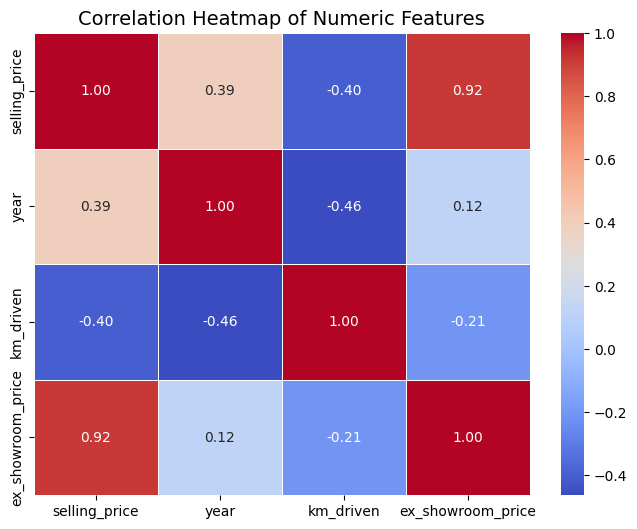

In [13]:
# Generate a heatmap of the correlation matrix for all numeric columns
# and identify the strongest correlations

# Select only numeric columns
numeric_df = bike_encoded.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


Observations:

 - year and selling_price show a strong positive correlation, meaning newer bikes tend to have higher prices.

 - km_driven has a negative correlation with selling_price, suggesting that bikes with higher mileage generally sell for less.

 - The dummy variables for seller_type have weak correlations with other numeric columns — indicating seller type does not heavily influence price on its own.

 - Other correlations are minor, which means bike age and usage are the most significant price factors in this dataset.

10. Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.


Report Summary:

Exploratory Data Analysis (EDA) Summary — Bike Details Dataset

 - Key Factors Affecting Selling Price:

    - Year of Manufacture: Strong positive relationship — newer bikes tend to have higher prices.

    - Kilometers Driven: Negative correlation — higher mileage usually lowers resale value.

    - Ownership Type: Bikes with fewer owners (1st owner) are generally priced higher.

    - Seller Type: Dealers tend to sell bikes at slightly higher average prices than individuals.

 - Data Cleaning Steps:

    - Checked and handled missing values — ex_showroom_price had ~55% missing data and was considered for removal or median imputation.

    - Removed outliers from km_driven using the IQR method.

    - Verified and corrected data types.

 - Feature Engineering:

    - Applied One-Hot Encoding on seller_type.

    - Created new columns: seller_Dealer, seller_Individual, seller_Trustmark Dealer.

 - Key Insights:

    - Most bikes fall within ₹20,000–₹1,00,000 range.

    - Dataset dominated by individual sellers and first owners.

    - Cleaned and consistent dataset ready for modeling.

Conclusion:
The age, mileage, and ownership type of a bike are the most influential factors in determining its resale value.